In [146]:
from google.colab import files
files.download('End-to-End Agenti AI App.ipynb')


FileNotFoundError: Cannot find file: End-to-End Agenti AI App.ipynb

# End to End Agentic AI application with Tools and Astra DB

### Installing essential libraries and connecting to Vector DB

In [1]:
!pip install langchain langsmith langchain_community langgraph cassandra-driver cassio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.4/151.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.35
    Uninstalling langchain-core-0.3.35:
      Successfully uninstalled langchain-core-0.3.35
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.18
    Uninstalling langchain-0.3.18:
      Successfully uninstalled langchain-0.3.18


In [2]:
import cassio
# Connection to Astra DB
ASTRA_DB_APPLICATION_TOKEN = ""
ASTRA_DB_ID = ""

# Initialize ASTRA DB Connection
cassio.init(
    token=ASTRA_DB_APPLICATION_TOKEN,
    database_id=ASTRA_DB_ID
)

In [3]:
# Installing more essential libraries

!pip install tiktoken langchain-groq langchainhub langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


### Data Ingestion and Preprocessing

In [67]:
from langchain_community.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Document URLs that we will read
urls = ['https://medium.com/analytics-vidhya/classification-in-machine-learning-ed30753d9461',
        'https://medium.com/@elisowski/ai-agents-vs-agentic-ai-whats-the-difference-and-why-does-it-matter-03159ee8c2b4',
        'https://skphd.medium.com/interview-questions-and-answers-on-retrieval-augmented-generation-rag-f5fb7b5b8228',
        'https://www.ibm.com/think/topics/langchain']

# Load the documents and then split the documents using Text Splitter
loader = WebBaseLoader(urls)
docs = loader.load()


In [87]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 600, chunk_overlap = 100)
texts = text_splitter.split_documents(docs)

In [88]:
# Number of chunks created
len(texts)

165

In [90]:
# See the overlap between page_content of different chunks
texts[0:3]

[Document(metadata={'source': 'https://medium.com/analytics-vidhya/classification-in-machine-learning-ed30753d9461', 'title': 'Classification In Machine Learning | by Amit Upadhyay | Analytics Vidhya | Medium', 'description': 'Two of the most Supervised learning algorithm tasks are Regression (predicting some value) and Classification (Predicting Class). It can be performed on both structure and unstructured data. The…', 'language': 'en'}, page_content='Classification In Machine Learning | by Amit Upadhyay | Analytics Vidhya | MediumOpen in appSign upSign inWriteSign upSign inClassification In Machine LearningAmit Upadhyay·FollowPublished inAnalytics Vidhya·11 min read·Jul 16, 2020--ListenShareClassification topics covered in this story are:· What is Classification?· Why do we need classification?· Classification terminologies· Types of Classification Algorithms· Performance measure for classification algorithm· Algorithm Selection1-> What is Classification?Two of the most Supervised l

In [92]:
# Let's convert the content into vector embeddings
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name = "all-MiniLM-L6-v2")

In [103]:
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store = Cassandra(embedding=embeddings,
                               table_name="qa_mini_demo1",
                               session = None,
                               keyspace=None)

In [104]:
# Insert documents into the vector DB
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(texts)   # <- Insert all the documents

['8840fe76909748dc9f5d8b59a2fedbed',
 'f9c61f837e3842a79043027dcabcefbf',
 'b5b44cb3f5344777a9ab66ea440bf593',
 '0137dcb63c44408386530550be9af4d7',
 'bbeca87270d54ceabff3f3a048de87a6',
 '256cbcf007564715ab272cc642eaabe7',
 '62b9be09e2c14240b53c8acde0d5e718',
 '14e53c4772964552bf8de96d5842ebd0',
 'ad8998ef7e674664a51d717600b058b7',
 'b749352a4758440dbf652b034390ba44',
 'cc118aee275d4be5a6ebfa7cae361add',
 '73987fc2081941269bd3174c9b33c170',
 '17b77402b30a4fcdbf32d3c240e19e2f',
 'b7552089de6742a09ad225c7fcd7b56b',
 '5db833e26a5a44adb72dd12f018f4597',
 '3570f54fb29849aa8197de56764abfac',
 '31481675e63642be8be3cc0871ad54f6',
 '67a9d1b607ff459ebc577bfc302dd03d',
 'd9ade04feead44d0b71e6571f7e51934',
 '4c6dd5e7cc4d4085bde5bf3e975a92e5',
 '699b1f8acbac4877b93445a5bdaf7bcd',
 '4780a5ca8c9b432da3bbbfa10a4862e0',
 '72c152e379224b61a1bbe4836bf0fa8a',
 '10c51b5160db40d983cb1063719b0a3a',
 '26f2697082324609801494fdf6badbd9',
 '173636301d2641c2b402915baccb17db',
 '53eaa41c3d5b48b594648fdf9967d4a7',
 

In [100]:
# This wrapper will allow us to interact with the database
astra_vector_index = VectorStoreIndexWrapper(vectorstore = astra_vector_store)

In [105]:
# Cannot directly use astra_vector_index to interact with database - Need a Retriever
retriever = astra_vector_store.as_retriever()

In [109]:
retriever.invoke("What is the best classification technique?")

[Document(id='b5b44cb3f5344777a9ab66ea440bf593', metadata={'description': 'Two of the most Supervised learning algorithm tasks are Regression (predicting some value) and Classification (Predicting Class). It can be performed on both structure and unstructured data. The…', 'language': 'en', 'source': 'https://medium.com/analytics-vidhya/classification-in-machine-learning-ed30753d9461', 'title': 'Classification In Machine Learning | by Amit Upadhyay | Analytics Vidhya | Medium'}, page_content='classify if email is spam or not. Given a handwritten character, classify it as one of the known characters.Email or SpamClassification is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as target, label or categories.In machine learning and statistics, classification is the problem of identifying to which of a set of categorie

## Implementing Query Routing With LangGraph

In [110]:
# LangGraph Application
from typing import Literal

# When we are creating route query, we need to inherit the base model
# With function-calling models it's simple to use models for classification, which is what routing comes down to:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field




In [111]:
# Data Model - this is all available in the documentation
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""

    datasource: Literal["vectorstore", "wiki_search"] = Field(
        ...,
        description="Given a user question choose which datasource would be most relevant for answering their question",
    )

In [112]:
from langchain_groq import ChatGroq
import os

from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [114]:
# Initialize LLM Model
llm = ChatGroq(groq_api_key = GROQ_API_KEY, model_name = "llama-3.3-70b-versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7aad7a7f4710>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7aad7abd9e10>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [116]:
# Our router is very important, based on user query, I need to give control to either of the paths.
# Let's integrate Route Query with LLM as well

structured_llm_router = llm.with_structured_output(RouteQuery)

In [124]:
# Let's create a prompt for router LLM
system = """You are an expert at routing a user question to the appropriate data source.

The vector store contains documents related to AI Agents, Basic Statistical Machine Learning Classification Algos(does not include Deep learning), RAG interview questions.
Use the vector store for questions on these topics. Otherwise, use wiki search"""

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

# Create a variable - this entire task will be done by our LLM
question_router = route_prompt | structured_llm_router

In [128]:
print(question_router.invoke({
    "question": "What is Apache Spark?"
}))

datasource='wiki_search'


## Integrating Wikipedia Search

This is an external tool that we are integrating to our workflow

In [129]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=1ff40ddcc4625a15191e37418d0a9c1e31ce2d07bf41dd8b9f4ed5e339ed892a
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [130]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

api_wrapper = WikipediaAPIWrapper(top_k_results = 1, doc_content_chars_max = 300)
wiki = WikipediaQueryRun(api_wrapper = api_wrapper)

In [131]:
wiki.run("Who is SRK?")

'Page: Ra.One\nSummary: Ra.One is a 2011 Indian Hindi-language superhero film directed by Anubhav Sinha and produced by Gauri Khan under Red Chillies Entertainment. The film stars Shah Rukh Khan in a dual role and Arjun Rampal as the titular antagonist, with Kareena Kapoor, Armaan Verma, Shahana Goswa'

## Define Functionality of Nodes

In [133]:
from typing import List

from typing_extensions import TypedDict

class GraphState(TypedDict):
  """
  Represents the state of our graph

  Attributes:
    question : question
    generation : LLM generation
    documents : list of documents
  """

  question = str                     # Question asked be user will be stored here
  generation = str
  documents: List[str]               # LLM Response will be stored here

In [136]:
# For Vector DB Search Agent

def retrieve(state):
  """
  Retrieve Documents

  Args:
    state (dict) : The current graph state

  Returns:
    state (dict) : New key added to state, documents, that contains retrived documents
  """

  print("---RETRIEVE---")
  question = state["question"]

  ## Retrieval
  documents = retriever.invoke(question)

  return {"documents":documents, "question":question}

In [137]:
# Similarly for Wikipedia Search Agent
from langchain.schema import Document

def wiki_search(state):
  """
  Wiki Search based on the re-phrased question.

  Args:
    state(dict) : The current state of the graph

  Returns:
    state(dict) : Updates document key with appended web results
  """

  print("---WIKIPEDIA---")
  question = state["question"]

  print(question)

  # Wiki Search
  # Doing wikipedia search, converting and returning them in documents
  docs = wiki.invoke({"query": question})
  wiki_results = docs
  wiki_results = Document(page_content = wiki_results)

  return {"documents": wiki_results, "question": question}

In [134]:
# Lastly, defining Routing node

def route_question(state):
  """
  Route question to wiki search or RAG

  Args:
    state(dict) : The current graph state

  Returns:
    str: Next node to call
  """

  print("---ROUTE QUESTION---")
  question = state["question"]
  source = question_router.invoke({"question":question})

  if source.datasource == "wiki_search":
    return "wiki_search"
  elif source.datasource == "vectorstore":
    return "vectorstore"

## Constructing LangGraph Workflow

In [138]:
from langgraph.graph import START, END, StateGraph
workflow = StateGraph(GraphState)

In [141]:
# Define the nodes
workflow.add_node("wiki_search", wiki_search)   # Web Search -  Node name is "wiki_search", functionality is wiki_search
workflow.add_node("retrieve", retrieve)         # Do Vector Search

# Build the Graph
workflow.add_conditional_edges(
    START,
    route_question,
     {
        "wiki_search" : "wiki_search",
        "vectorstore" : "retrieve"
    }
)
workflow.add_edge("wiki_search", END)
workflow.add_edge("retrieve", END)

# Compile
app = workflow.compile()



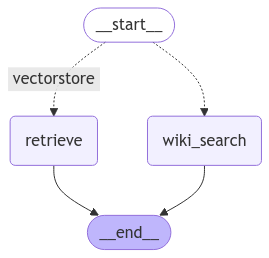

In [142]:
# Refer to Documentation
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [144]:
!pip freeze

absl-py==1.4.0
accelerate==1.3.0
aiofiles==24.1.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.12
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.4
ale-py==0.10.1
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.2.10.0.33.26
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backoff==2.2.1
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.36.0
bigquery-magics==0.5.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.1.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.1
cassandra-driver==3.29.2
cassio==0.1.10
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.88
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorl